# Aerosols in NorESM

### Overview over aerosol species in NorESM 

The table below is from Kirkevåg et al 2018 (https://doi.org/10.5194/gmd-11-3945-2018) which you can check for more details :) 


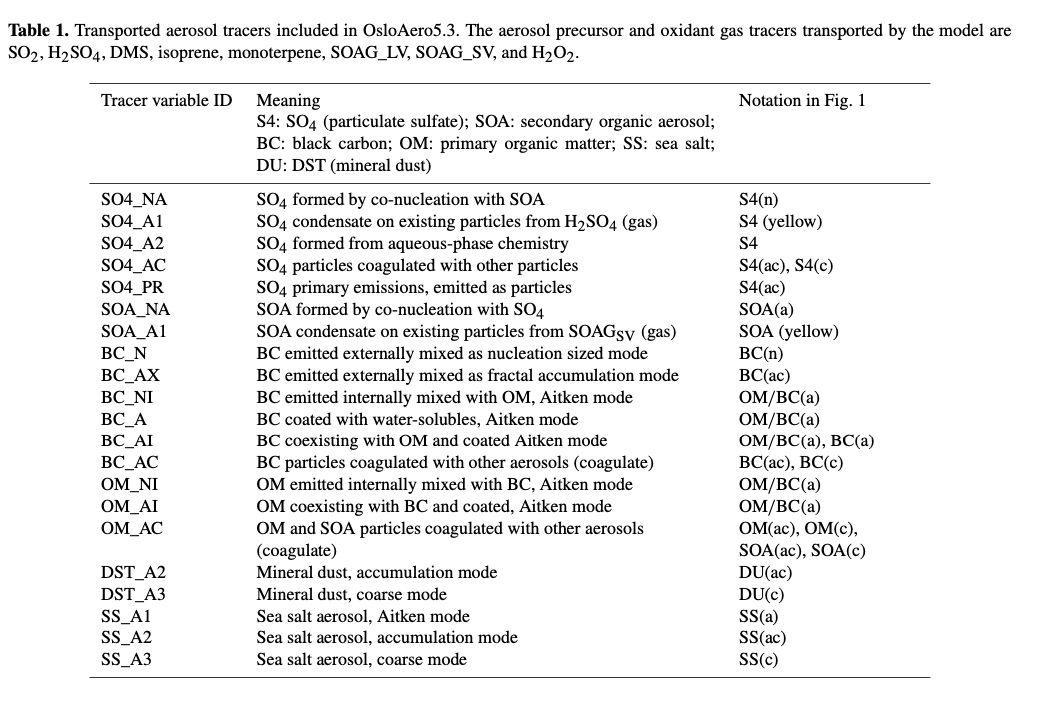

# Notebook example on how to read-only with xarray files on the metno s3 store

key, secret key and endpoint can also be used to browse the store in jupyterlab bucket explorer

In [5]:
import s3fs
import xarray as xr
import s3fs
s3 = s3fs.S3FileSystem(key="K1CQ7M1DMTLUFK182APD", 
                       secret="3JuZAQm5I03jtpijCpHOdkAsJDNLNfZxBpM15Pi0", 
                       client_kwargs=dict(endpoint_url="https://rgw.met.no"))
s3.ls('escience2022')

['escience2022/Ada',
 'escience2022/Antoine',
 'escience2022/Dominic',
 'escience2022/ESA_SMOS_sss',
 'escience2022/Remy',
 'escience2022/Sara',
 'escience2022/Zhihong']

## Data for stations is in two folders: 

2012-2015 is in: 
```python 
'escience2022/Sara/NorESM_nudged_data/postproc/stations/OsloAero_intBVOC_f09_f09_mg17_full'
```
and 2015-2018 in:
```python 
'escience2022/Sara/NorESM_nudged_data/postproc/stations/OsloAero_intBVOC_f09_f09_mg17_ssp245'
```


## Example: check files in OsloAero_intBVOC_f09_f09_mg17_full

In [6]:
s3.ls('escience2022/Sara/NorESM_nudged_data/postproc/stations/OsloAero_intBVOC_f09_f09_mg17_full')

['escience2022/Sara/NorESM_nudged_data/postproc/stations/OsloAero_intBVOC_f09_f09_mg17_full/ABSVIS_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc',
 'escience2022/Sara/NorESM_nudged_data/postproc/stations/OsloAero_intBVOC_f09_f09_mg17_full/ACTNI_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc',
 'escience2022/Sara/NorESM_nudged_data/postproc/stations/OsloAero_intBVOC_f09_f09_mg17_full/ACTNL_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc',
 'escience2022/Sara/NorESM_nudged_data/postproc/stations/OsloAero_intBVOC_f09_f09_mg17_full/ACTREI_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc',
 'escience2022/Sara/NorESM_nudged_data/postproc/stations/OsloAero_intBVOC_f09_f09_mg17_full/ACTREL_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc',
 'escience2022/Sara/NorESM_nudged_data/postproc/stations/OsloAero_intBVOC_f09_f09_mg17_full/AEROD_v_OsloAero_intBVOC_f09_f

## To ease imports, you can pick out the files you want to look at and find the files like this: 

In [7]:
varl = ['N100','N200','N50', 'BC_AI'] 

In [8]:
path_to_data = 's3://escience2022/Sara/NorESM_nudged_data/postproc/stations/OsloAero_intBVOC_f09_f09_mg17_full/'
postfix = '_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc'

In [9]:
def make_file_path_for_var(v,):
    return path_to_data+v+postfix

In [10]:
filelist = [make_file_path_for_var(v) for v in varl]

In [11]:
filelist

['s3://escience2022/Sara/NorESM_nudged_data/postproc/stations/OsloAero_intBVOC_f09_f09_mg17_full/N100_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc',
 's3://escience2022/Sara/NorESM_nudged_data/postproc/stations/OsloAero_intBVOC_f09_f09_mg17_full/N200_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc',
 's3://escience2022/Sara/NorESM_nudged_data/postproc/stations/OsloAero_intBVOC_f09_f09_mg17_full/N50_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc',
 's3://escience2022/Sara/NorESM_nudged_data/postproc/stations/OsloAero_intBVOC_f09_f09_mg17_full/BC_AI_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc']

In [12]:
list_of_s3_obj = [s3.open(s) for s in filelist]

ds = xr.open_mfdataset(list_of_s3_obj)

ds

<xarray.Dataset>
Dimensions:   (lev: 32, time: 26281, location: 5)
Coordinates:
  * lev       (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
  * time      (time) datetime64[ns] 2012-01-02 ... 2015-01-01
  * location  (location) object 'Puijo' 'Zeppelin' ... 'Pallas' 'Jungfraujoch'
Data variables:
    BC_AI     (location, time, lev) float32 dask.array<chunksize=(5, 26281, 32), meta=np.ndarray>
    N100      (location, time, lev) float64 dask.array<chunksize=(5, 26281, 32), meta=np.ndarray>
    N200      (location, time, lev) float64 dask.array<chunksize=(5, 26281, 32), meta=np.ndarray>
    N50       (location, time, lev) float64 dask.array<chunksize=(5, 26281, 32), meta=np.ndarray>

In [13]:
ds.sel(location='Zeppelin')

<xarray.Dataset>
Dimensions:   (lev: 32, time: 26281)
Coordinates:
  * lev       (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
  * time      (time) datetime64[ns] 2012-01-02 ... 2015-01-01
    location  <U8 'Zeppelin'
Data variables:
    BC_AI     (time, lev) float32 dask.array<chunksize=(26281, 32), meta=np.ndarray>
    N100      (time, lev) float64 dask.array<chunksize=(26281, 32), meta=np.ndarray>
    N200      (time, lev) float64 dask.array<chunksize=(26281, 32), meta=np.ndarray>
    N50       (time, lev) float64 dask.array<chunksize=(26281, 32), meta=np.ndarray>

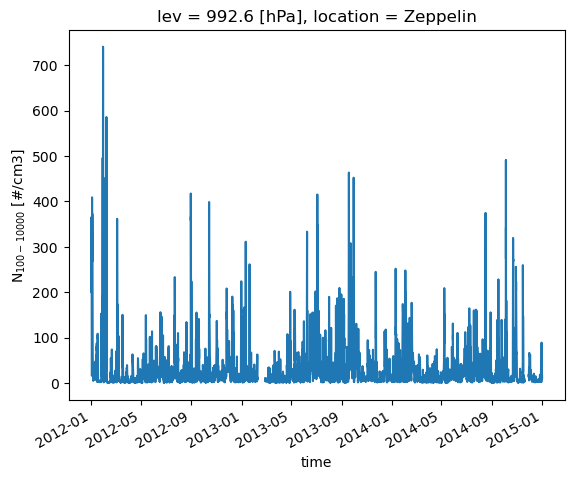

In [14]:
ds.isel(lev=-1).sel(location='Zeppelin')['N100'].plot()

### Aerosol mass for aerosol: 

Let's try to get the total sulphate aerosol 

Consult the table below. We want everything with SO4 in it. 

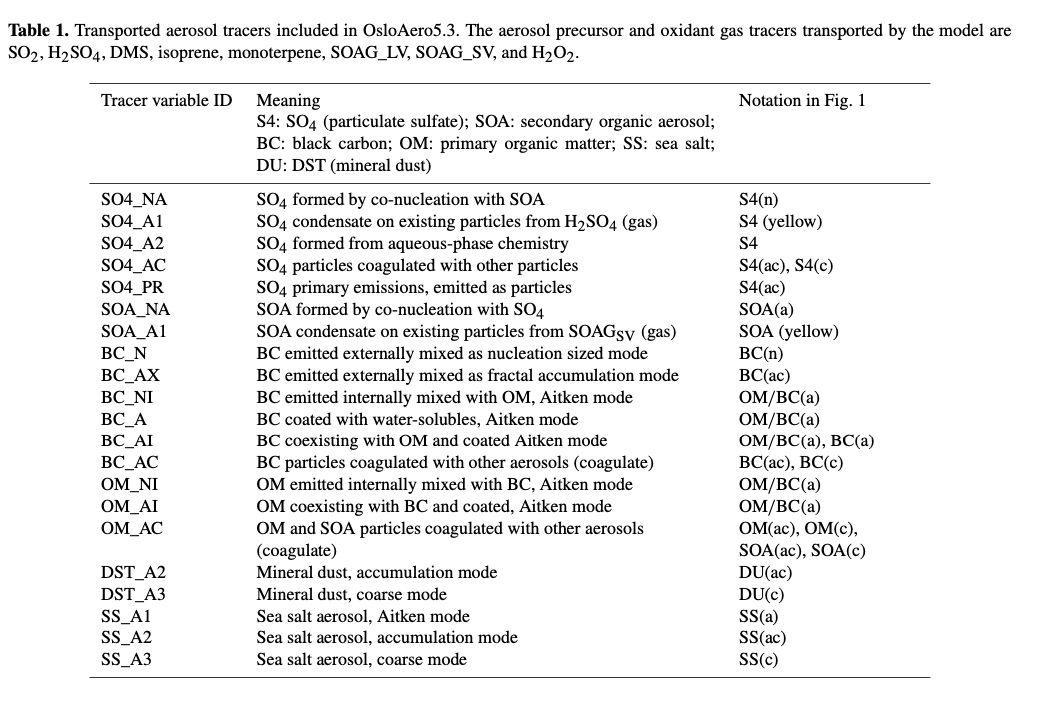

In [15]:
sulphate_varl = ['SO4_NA', 'SO4_A1', 'SO4_A2', 'SO4_AC','SO4_PR'] 

In [16]:
path_to_data = 's3://escience2022/Sara/NorESM_nudged_data/postproc/stations/OsloAero_intBVOC_f09_f09_mg17_ssp245/'
postfix = '_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2018-01-01_hour_locations.nc'

In [17]:
def make_file_path_for_var(v,):
    return path_to_data+v+postfix

In [18]:
filelist = [make_file_path_for_var(v) for v in sulphate_varl]

In [19]:
filelist

['s3://escience2022/Sara/NorESM_nudged_data/postproc/stations/OsloAero_intBVOC_f09_f09_mg17_ssp245/SO4_NA_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2018-01-01_hour_locations.nc',
 's3://escience2022/Sara/NorESM_nudged_data/postproc/stations/OsloAero_intBVOC_f09_f09_mg17_ssp245/SO4_A1_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2018-01-01_hour_locations.nc',
 's3://escience2022/Sara/NorESM_nudged_data/postproc/stations/OsloAero_intBVOC_f09_f09_mg17_ssp245/SO4_A2_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2018-01-01_hour_locations.nc',
 's3://escience2022/Sara/NorESM_nudged_data/postproc/stations/OsloAero_intBVOC_f09_f09_mg17_ssp245/SO4_AC_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2018-01-01_hour_locations.nc',
 's3://escience2022/Sara/NorESM_nudged_data/postproc/stations/OsloAero_intBVOC_f09_f09_mg17_ssp245/SO4_PR_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2018-01-01_hour_locations.nc']

In [20]:
list_of_s3_obj = [s3.open(s) for s in filelist]

ds = xr.open_mfdataset(list_of_s3_obj)

ds

<xarray.Dataset>
Dimensions:   (lev: 32, time: 26352, location: 5)
Coordinates:
  * lev       (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
  * time      (time) datetime64[ns] 2015-01-01 ... 2018-01-02T23:00:00
  * location  (location) object 'Puijo' 'Zeppelin' ... 'Pallas' 'Jungfraujoch'
Data variables:
    SO4_A1    (location, time, lev) float32 dask.array<chunksize=(5, 26352, 32), meta=np.ndarray>
    SO4_A2    (location, time, lev) float32 dask.array<chunksize=(5, 26352, 32), meta=np.ndarray>
    SO4_AC    (location, time, lev) float32 dask.array<chunksize=(5, 26352, 32), meta=np.ndarray>
    SO4_NA    (location, time, lev) float32 dask.array<chunksize=(5, 26352, 32), meta=np.ndarray>
    SO4_PR    (location, time, lev) float32 dask.array<chunksize=(5, 26352, 32), meta=np.ndarray>

## Example: Calculate total sulphate

In [21]:
ds['SO4_tot'] = 0
for var in sulphate_varl:
    ds['SO4_tot'] = ds['SO4_tot'] + ds[var]

ds['SO4_tot'].attrs['units'] = ds[var].attrs['units']

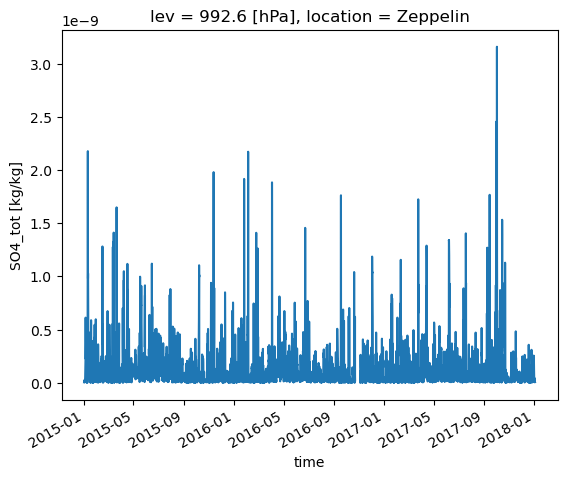

In [22]:
ds.isel(lev=-1).sel(location='Zeppelin')['SO4_tot'].plot()

## Need to convert to mass? 

For now let's assume standard pressure and temperature.

Ideal gas law gives us: 

$$ p = \rho R T$$

$$ \rho = p/ (R T)$$

In [23]:
T_standard =  273.15 #K
p_standard = 1e5 #Pa
R = 287.058


In [24]:
rho = p_standard/(R*T_standard)
rho

1.2753492774515685

## Change unit of SO4_tot

In [25]:
ds['SO4_tot']

<xarray.DataArray 'SO4_tot' (location: 5, time: 26352, lev: 32)>
dask.array<add, shape=(5, 26352, 32), dtype=float64, chunksize=(5, 26352, 32), chunktype=numpy.ndarray>
Coordinates:
  * lev       (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
  * time      (time) datetime64[ns] 2015-01-01 ... 2018-01-02T23:00:00
  * location  (location) object 'Puijo' 'Zeppelin' ... 'Pallas' 'Jungfraujoch'
Attributes:
    units:    kg/kg

In [26]:
var = 'SO4_tot'
if ds[var].attrs['units'] =='kg/kg':
    ds[var] = ds[var]*rho
    ds[var].attrs['units'] = 'kg/m3'
    ## Change to ug/m3
    ds[var] = ds[var]*1e9
    ds[var].attrs['units'] = 'ug/m3'
                

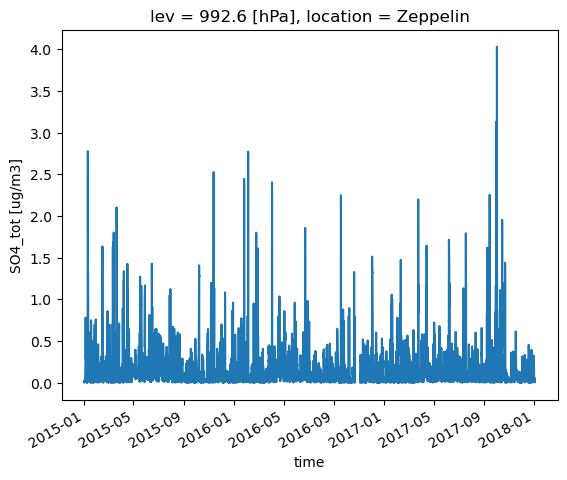

In [27]:
ds['SO4_tot'].sel(location='Zeppelin').isel(lev=-1).plot()

In [28]:
ds['SO4_tot']b

<xarray.DataArray 'SO4_tot' (location: 5, time: 26352, lev: 32)>
dask.array<mul, shape=(5, 26352, 32), dtype=float64, chunksize=(5, 26352, 32), chunktype=numpy.ndarray>
Coordinates:
  * lev       (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
  * time      (time) datetime64[ns] 2015-01-01 ... 2018-01-02T23:00:00
  * location  (location) object 'Puijo' 'Zeppelin' ... 'Pallas' 'Jungfraujoch'
Attributes:
    units:    ug/m3